In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
np.set_printoptions(precision=3, suppress=True)
#plt.rcParams["text.usetex"] = True

# TDVP

In [8]:
B = 9
g1 = 5
g2 = 1/50
a = 20


def N(m1,m2,m12):
    return (1 + m1*np.conj(m1) + m2*np.conj(m2)+ (m1*m2+m12)*np.conj(m1*m2+m12)).real
#m1*m2*np.conj(m1*m2) + m1*m2*np.conj(m12)+ np.conj(m1*m2)*m12 + m12*np.conj(m12)


# Gram-Matrix
def InvGramMat(m1,m2,m12):
    G = np.zeros((3,3), dtype=complex)
    G[0,0] = (1+m1*np.conj(m1))**2 + m12*np.conj(m12)
    G[1,1] = (1+m2*np.conj(m2))**2 + m12*np.conj(m12)
    G[2,2] = 1+m1*np.conj(m1) + m2*np.conj(m2)
    
    G[0,1] = -(m1**2)*np.conj(m12) - (np.conj(m2)**2)*m12
    G[0,2] = m2*(1+m2*np.conj(m2)) - np.conj(m1)*m12
    G[1,2] = m1*(1+m1*np.conj(m1)) - np.conj(m2)*m12
    
    G[1,0] = np.conj(G[0,1])
    G[2,0] = np.conj(G[0,2])
    G[2,1] = np.conj(G[1,2])
    G = G/(N(m1,m2,m12)**2)
    G_ = np.linalg.inv(G)
    print(G_)
    return G_

def dH(m1,m2,m12):
    dH1_m1 = -B*g1*(m1*((1+m2*np.conj(m2))**2) + np.conj(m2)*m12*(1+m2*np.conj(m2)) )
    dH1_m2 = B*g1*np.conj(m12)*(m1*m2+m12)
    dH1_m12 = -B*g1*(m1*m2+m12)*(1+m2*np.conj(m2))
    
    dH2_m1 = B*g2*np.conj(m12)*(m1*m2+m12)
    dH2_m2 = -B*g2*(m2*((1+m1*np.conj(m1))**2) + np.conj(m1)*m12*(1+m1*np.conj(m1)) )
    dH2_m12 = -B*g2*(m1*m2+m12)*(1+m1*np.conj(m1))
    
    dH3_m1 = (a/2)*(m2-m1)*(m1*np.conj(m2)+1)*(1+m2*np.conj(m2)) + np.conj(m12)*(m1*m2+m12) + m12*np.conj(m2)
    dH3_m2 = (a/2)*(m1-m2)*(m2*np.conj(m1)+1)*(1+m1*np.conj(m1)) + np.conj(m12)*(m1*m2+m12) + m12*np.conj(m1)
    dH3_m12 = (a/2)*((np.conj(m1)-np.conj(m2))*(m1-m2)*(m1*m2+m12))
    
    dH_m1 = dH1_m1 + dH2_m1 + dH3_m1
    dH_m2 = dH1_m2 + dH2_m2 + dH3_m2
    dH_m12 = dH1_m12 + dH2_m12 + dH3_m12
    
    dH = np.array([dH_m1,dH_m2,dH_m12])/(N(m1,m2,m12)**2)
    return dH

                 
def dm(t,m):
    m1 = m[0]
    m2 = m[1]
    m12 = m[2]
    InvGram = InvGramMat(m1,m2,m12)
    H = dH(m1,m2,m12)
    dm1 = -1j * (H[0]*InvGram[0,0] + H[1]*InvGram[0,1] +  H[2]*InvGram[0,2])
    dm2 = -1j * (H[0]*InvGram[1,0] + H[1]*InvGram[1,1] +  H[2]*InvGram[1,2])
    dm3 = -1j * (H[0]*InvGram[2,0] + H[1]*InvGram[2,1] +  H[2]*InvGram[2,2])                 
    dm = np.array([dm1,dm2,dm3])
    return dm


In [13]:
G = InvGramMat(2,1,7)
G

[[ 224.8  +0.j  126.587+0.j  386.307+0.j]
 [ 126.587+0.j  218.253+0.j  144.047+0.j]
 [ 386.307+0.j  144.047+0.j 1962.091+0.j]]


array([[ 224.8  +0.j,  126.587+0.j,  386.307+0.j],
       [ 126.587+0.j,  218.253+0.j,  144.047+0.j],
       [ 386.307+0.j,  144.047+0.j, 1962.091+0.j]])

In [3]:
dH1_m1 = -B*g1*(m1*((1+m2.np.conj(m2))**2) + np.conj(m2)*m12*(1+m2.np.conj(m2)) )
dH1_m2 = B*g1*np.conj(m12)*(m1*m2+m12)
dH1_m12 = -B*g1*(m1*m2+m12)*(1+m2*np.conj(m2))

dH2_m1 = B*g2*np.conj(m12)*(m1*m2+m12)
dH2_m2 = -B*g2*(m2*((1+m1.np.conj(m1))**2) + np.conj(m1)*m12*(1+m1.np.conj(m1)) )
dH2_m12 = -B*g2*(m1*m2+m12)*(1+m1*np.conj(m1))

dH3_m1 = (a/2)*(m2-m1)*(m1*np.conj(m2)+1)*(1+m2*np.conj(m2)) + np.conj(m12)*(m1*m2+m12) + m12*np.conj(m2)
dH3_m2 = (a/2)*(m1-m2)*(m2*np.conj(m1)+1)*(1+m1*np.conj(m1)) + np.conj(m12)*(m1*m2+m12) + m12*np.conj(m1)
dH3_m12 = (a/2)*((np.conj(m1)-np.conj(m2))*(m1-m2)*(m1*m2+m12))

NameError: name 'm1' is not defined

# Spin

$$ S_x = \frac{1}{2}\frac{\overline{\mu_1}+\mu_1 + \overline{\mu_2}(\mu_1\mu_2 + \mu_{12}) + \mu_2(\overline{\mu_1\mu_2 + \mu_{12}})}{1 + \mu_1\overline{\mu_1} + \mu_2\overline{\mu_2} + (\mu_1\mu_2 + \mu_{12})\overline{(\mu_1\mu_2 + \mu_{12})}}$$
$$S_y = \frac{i}{2}\frac{\overline{\mu_1}-\mu_1 + \overline{\mu_2}(\mu_1\mu_2 + \mu_{12}) + \mu_2(\overline{\mu_1\mu_2 + \mu_{12}})}{1 + \mu_1\overline{\mu_1} + \mu_2\overline{\mu_2} + (\mu_1\mu_2 + \mu_{12})\overline{(\mu_1\mu_2 + \mu_{12})}}$$

In [10]:
def S(m):
    m1 = m[0]
    m2 = m[1]
    m12= m[2]
    Sx = (0.5 * (m1 + np.conj(m1) + np.conj(m2)*(m1*m2 + m12) + m2*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    Sy = (0.5j * (m1 - np.conj(m1) - np.conj(m2)*(m1*m2 + m12) + m2*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    Sz = (0.5 * (1 - m1*np.conj(m1) - m2*np.conj(m2) - (m1*m2 + m12)*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    return np.array([Sx,Sy,Sz])
          
def I(m):
    m_ = np.array([m[1],m[0],m[2]])
    return S(t,m_)

# Runge-Kutta

In [99]:
N(1,1,2j)

8.0

<IPython.core.display.Javascript object>


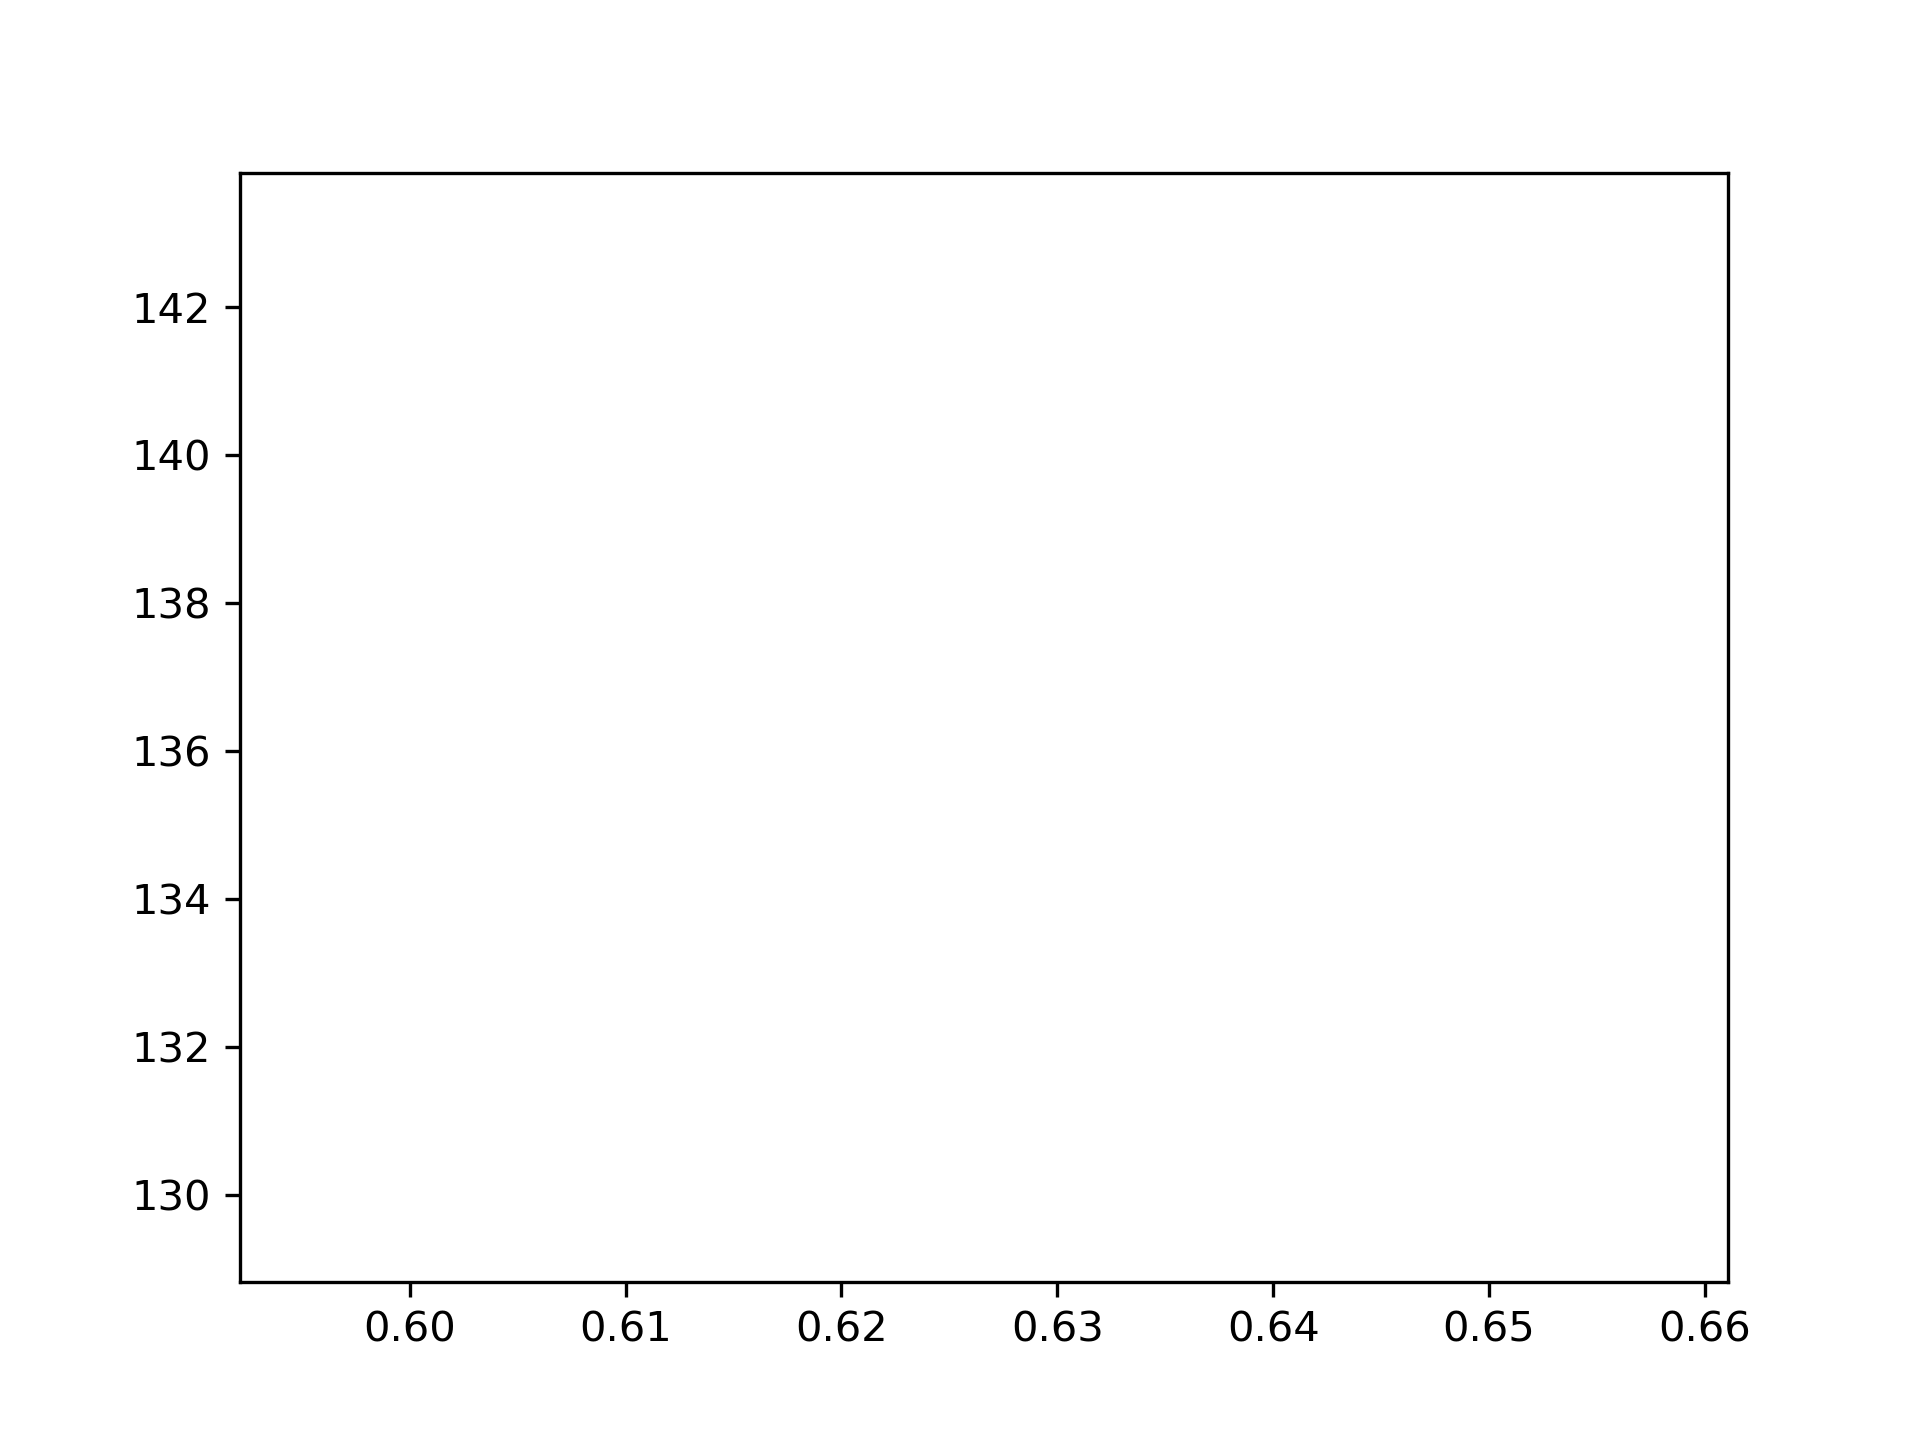

[[-1.338e+08-8.674e-11j  1.041e-09-1.355e+07j -3.218e+07+2.168e+10j]
 [ 1.041e-09+1.355e+07j  9.992e+07-1.572e-12j  1.695e+08-3.726e+07j]
 [-3.218e+07-2.168e+10j  1.695e+08+3.726e+07j -2.710e+11+6.987e-08j]]
[[-1.338e+08-4.337e-10j  5.966e-01-1.355e+07j -3.218e+07+2.168e+10j]
 [ 5.966e-01+1.355e+07j  9.992e+07-4.784e-12j  1.695e+08-3.726e+07j]
 [-3.218e+07-2.168e+10j  1.695e+08+3.726e+07j -2.710e+11+5.864e-09j]]
[[-1.338e+08-4.337e-10j  1.930e+03-1.355e+07j -3.268e+07+2.168e+10j]
 [ 1.930e+03+1.355e+07j  9.991e+07+7.244e-13j  1.696e+08-3.778e+07j]
 [-3.268e+07-2.168e+10j  1.696e+08+3.778e+07j -2.710e+11-7.303e-08j]]
[[-1.338e+08+8.673e-11j  9.653e+02-1.355e+07j -3.243e+07+2.168e+10j]
 [ 9.653e+02+1.355e+07j  9.991e+07+6.788e-13j  1.695e+08-3.752e+07j]
 [-3.243e+07-2.168e+10j  1.695e+08+3.752e+07j -2.710e+11+1.307e-08j]]
[[-1.338e+08-4.337e-10j  9.652e+02-1.355e+07j -3.243e+07+2.168e+10j]
 [ 9.652e+02+1.355e+07j  9.991e+07+2.100e-12j  1.695e+08-3.752e+07j]
 [-3.243e+07-2.168e+10j  1.695

 [ 2.310e+09-6.780e+09j  2.029e+09-1.177e+08j -3.218e+10-3.294e-06j]]
[[-3.139e+07-6.160e-09j -8.400e+05-1.831e+07j  2.492e+09+6.985e+09j]
 [-8.400e+05+1.831e+07j  2.699e+07-2.075e-09j  2.112e+09+1.377e+08j]
 [ 2.492e+09-6.985e+09j  2.112e+09-1.377e+08j -3.758e+10+9.342e-06j]]
[[-3.294e+07+1.429e-07j -9.334e+05-1.925e+07j  2.682e+09+7.199e+09j]
 [-9.334e+05+1.925e+07j  2.813e+07-1.760e-09j  2.201e+09+1.593e+08j]
 [ 2.682e+09-7.199e+09j  2.201e+09-1.593e+08j -4.382e+10-0.000e+00j]]
[[-3.461e+07+8.982e-09j -1.030e+06-2.026e+07j  2.880e+09+7.424e+09j]
 [-1.030e+06+2.026e+07j  2.934e+07-1.499e-09j  2.293e+09+1.824e+08j]
 [ 2.880e+09-7.424e+09j  2.293e+09-1.824e+08j -5.101e+10-5.254e-07j]]
[[-3.642e+07+1.751e-08j -1.130e+06-2.135e+07j  3.086e+09+7.660e+09j]
 [-1.130e+06+2.135e+07j  3.062e+07-5.128e-09j  2.391e+09+2.074e+08j]
 [ 3.086e+09-7.660e+09j  2.391e+09-2.074e+08j -5.926e+10+1.489e-05j]]
[[-3.837e+07-2.111e-09j -1.230e+06-2.252e+07j  3.300e+09+7.907e+09j]
 [-1.230e+06+2.252e+07j  3.19

 [ 9.233e+08-1.420e+10j  2.778e+09-5.023e+08j -2.274e+11+2.089e-05j]]
[[-7.974e+07+6.511e-09j  7.842e+06-3.178e+07j  9.520e+08+1.376e+10j]
 [ 7.842e+06+3.178e+07j  5.992e+07-5.429e-09j  2.801e+09+4.686e+08j]
 [ 9.520e+08-1.376e+10j  2.801e+09-4.686e+08j -2.057e+11-1.282e-05j]]
[[-7.580e+07+1.692e-08j  7.117e+06-3.149e+07j  9.913e+08+1.334e+10j]
 [ 7.117e+06+3.149e+07j  5.745e+07+0.000e+00j  2.825e+09+4.358e+08j]
 [ 9.913e+08-1.334e+10j  2.825e+09-4.358e+08j -1.860e+11-0.000e+00j]]
[[-7.212e+07-4.898e-09j  6.454e+06-3.122e+07j  1.040e+09+1.295e+10j]
 [ 6.454e+06+3.122e+07j  5.509e+07-1.937e-09j  2.851e+09+4.036e+08j]
 [ 1.040e+09-1.295e+10j  2.851e+09-4.036e+08j -1.683e+11+1.144e-05j]]
[[-6.868e+07+4.266e-09j  5.850e+06-3.098e+07j  1.099e+09+1.258e+10j]
 [ 5.850e+06+3.098e+07j  5.285e+07+2.319e-09j  2.878e+09+3.718e+08j]
 [ 1.099e+09-1.258e+10j  2.878e+09-3.718e+08j -1.524e+11+1.173e-06j]]
[[-6.548e+07-2.984e-08j  5.300e+06-3.077e+07j  1.166e+09+1.224e+10j]
 [ 5.300e+06+3.077e+07j  5.07

 [ 5.159e+10-8.673e+10j  8.674e+10+8.947e+10j -1.626e+13-1.726e-03j]]
[[-3.865e+07+0.000e+00j -5.038e+07-4.188e+08j  5.159e+10+8.673e+10j]
 [-5.038e+07+4.188e+08j -1.512e+08-5.371e-08j  8.673e+10-8.947e+10j]
 [ 5.159e+10-8.673e+10j  8.673e+10+8.947e+10j -1.626e+13+1.811e-04j]]
[[-4.005e+07+4.228e-08j -5.236e+07-4.266e+08j  5.209e+10+8.870e+10j]
 [-5.236e+07+4.266e+08j -1.548e+08+2.607e-08j  8.938e+10-9.037e+10j]
 [ 5.209e+10-8.870e+10j  8.938e+10+9.037e+10j -1.665e+13+1.106e-03j]]
[[-4.005e+07+6.342e-08j -5.236e+07-4.266e+08j  5.209e+10+8.870e+10j]
 [-5.236e+07+4.266e+08j -1.548e+08-3.940e-08j  8.938e+10-9.037e+10j]
 [ 5.209e+10-8.870e+10j  8.938e+10+9.037e+10j -1.665e+13+3.734e-03j]]
[[-4.158e+07+4.300e-08j -5.460e+07-4.353e+08j  5.268e+10+9.090e+10j]
 [-5.460e+07+4.353e+08j -1.591e+08-1.757e-08j  9.230e+10-9.144e+10j]
 [ 5.268e+10-9.090e+10j  9.230e+10+9.144e+10j -1.710e+13-7.680e-04j]]
[[-4.327e+07-6.567e-08j -5.713e+07-4.450e+08j  5.335e+10+9.333e+10j]
 [-5.713e+07+4.450e+08j -1.63

 [-3.798e+10+5.712e+11j  2.024e+11-1.540e+11j -9.642e+12+9.534e-04j]]
[[-1.746e+09+0.000e+00j  1.584e+08+1.312e+09j -3.798e+10-5.712e+11j]
 [ 1.584e+08-1.312e+09j  8.096e+08+7.946e-08j  2.024e+11+1.540e+11j]
 [-3.798e+10+5.712e+11j  2.024e+11-1.540e+11j -9.642e+12+3.667e-03j]]
[[-1.820e+09+1.000e-06j  2.015e+08+1.365e+09j -7.016e+10-5.816e+11j]
 [ 2.015e+08-1.365e+09j  8.085e+08-6.765e-08j  2.139e+11+1.503e+11j]
 [-7.016e+10+5.816e+11j  2.139e+11-1.503e+11j -1.089e+13+2.431e-03j]]
[[-1.820e+09-7.145e-07j  2.015e+08+1.365e+09j -7.016e+10-5.816e+11j]
 [ 2.015e+08-1.365e+09j  8.085e+08-8.794e-07j  2.139e+11+1.503e+11j]
 [-7.016e+10+5.816e+11j  2.139e+11-1.503e+11j -1.089e+13+4.675e-04j]]
[[-1.915e+09-1.513e-07j  2.521e+08+1.435e+09j -1.059e+11-5.951e+11j]
 [ 2.521e+08-1.435e+09j  8.053e+08-2.117e-07j  2.283e+11+1.462e+11j]
 [-1.059e+11+5.951e+11j  2.283e+11-1.462e+11j -1.296e+13+9.275e-04j]]
[[-1.915e+09+7.564e-07j  2.521e+08+1.435e+09j -1.059e+11-5.951e+11j]
 [ 2.521e+08-1.435e+09j  8.05

 [-2.936e+17+9.700e+16j  2.436e+17+1.560e+17j -9.747e+19-7.781e+06j]]
[[-5.783e+14+6.256e+03j  3.410e+14+4.199e+14j -1.731e+17-5.718e+16j]
 [ 3.410e+14-4.199e+14j -5.059e+14+5.473e+03j  1.436e+17-9.195e+16j]
 [-1.731e+17+5.718e+16j  1.436e+17+9.195e+16j -5.746e+19+6.216e+08j]]
[[ 3.172e+15-9.156e+04j -1.871e+15-2.303e+15j  9.495e+17+3.137e+17j]
 [-1.871e+15+2.303e+15j  2.775e+15-8.010e+04j -7.876e+17+5.044e+17j]
 [ 9.495e+17-3.137e+17j -7.876e+17-5.044e+17j  3.152e+20-9.098e+09j]]
[[-7.864e+14+6.337e+03j  4.637e+14+5.709e+14j -2.354e+17-7.776e+16j]
 [ 4.637e+14-5.709e+14j -6.879e+14+5.544e+03j  1.952e+17-1.250e+17j]
 [-2.354e+17+7.776e+16j  1.952e+17+1.250e+17j -7.814e+19+6.297e+08j]]
[[-1.631e+15-1.729e+03j  9.615e+14+1.184e+15j -4.880e+17-1.612e+17j]
 [ 9.615e+14-1.184e+15j -1.426e+15-1.513e+03j  4.048e+17-2.593e+17j]
 [-4.880e+17+1.612e+17j  4.048e+17+2.593e+17j -1.620e+20-1.718e+08j]]
[[ 1.139e+16-2.714e+06j -6.718e+15-8.272e+15j  3.410e+18+1.127e+18j]
 [-6.718e+15+8.272e+15j  9.96

C:\Users\salem\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
C:\Users\salem\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [11]:
m0 = np.array([100,200j,100])
M = sc.ode(dm).set_integrator('zvode',method='bdf') #, method='bdf'
M.set_initial_value(m0, 0)
t1 = 10
dt = 1
plt.figure(dpi=150)
t = []
f = []
while M.successful() and M.t < t1:
    
    M.integrate(M.t+dt)
    print( "t: ",M.t,"y: ", M.y)
    f.append(M.y)
    t.append(M.t)
    if not M.successful():
        print(t," : geht nicht")
t = np.array(t)
m = np.array(f)
plt.plot(t, m[:,0],"k-")


Spin_S = S(m.T).real.T
#Spin_I = I(m.T).real.T

In [61]:
#plt.figure(dpi=150)

Spin_I

array([[ 0.013, -0.008, -0.495],
       [ 0.017, -0.02 , -0.495],
       [ 0.016, -0.034, -0.494],
       [ 0.009, -0.045, -0.494],
       [-0.002, -0.047, -0.494],
       [-0.012, -0.039, -0.495],
       [-0.017, -0.027, -0.495],
       [-0.017, -0.014, -0.495],
       [-0.011, -0.004, -0.495],
       [-0.002, -0.001, -0.495]])

<IPython.core.display.Javascript object>


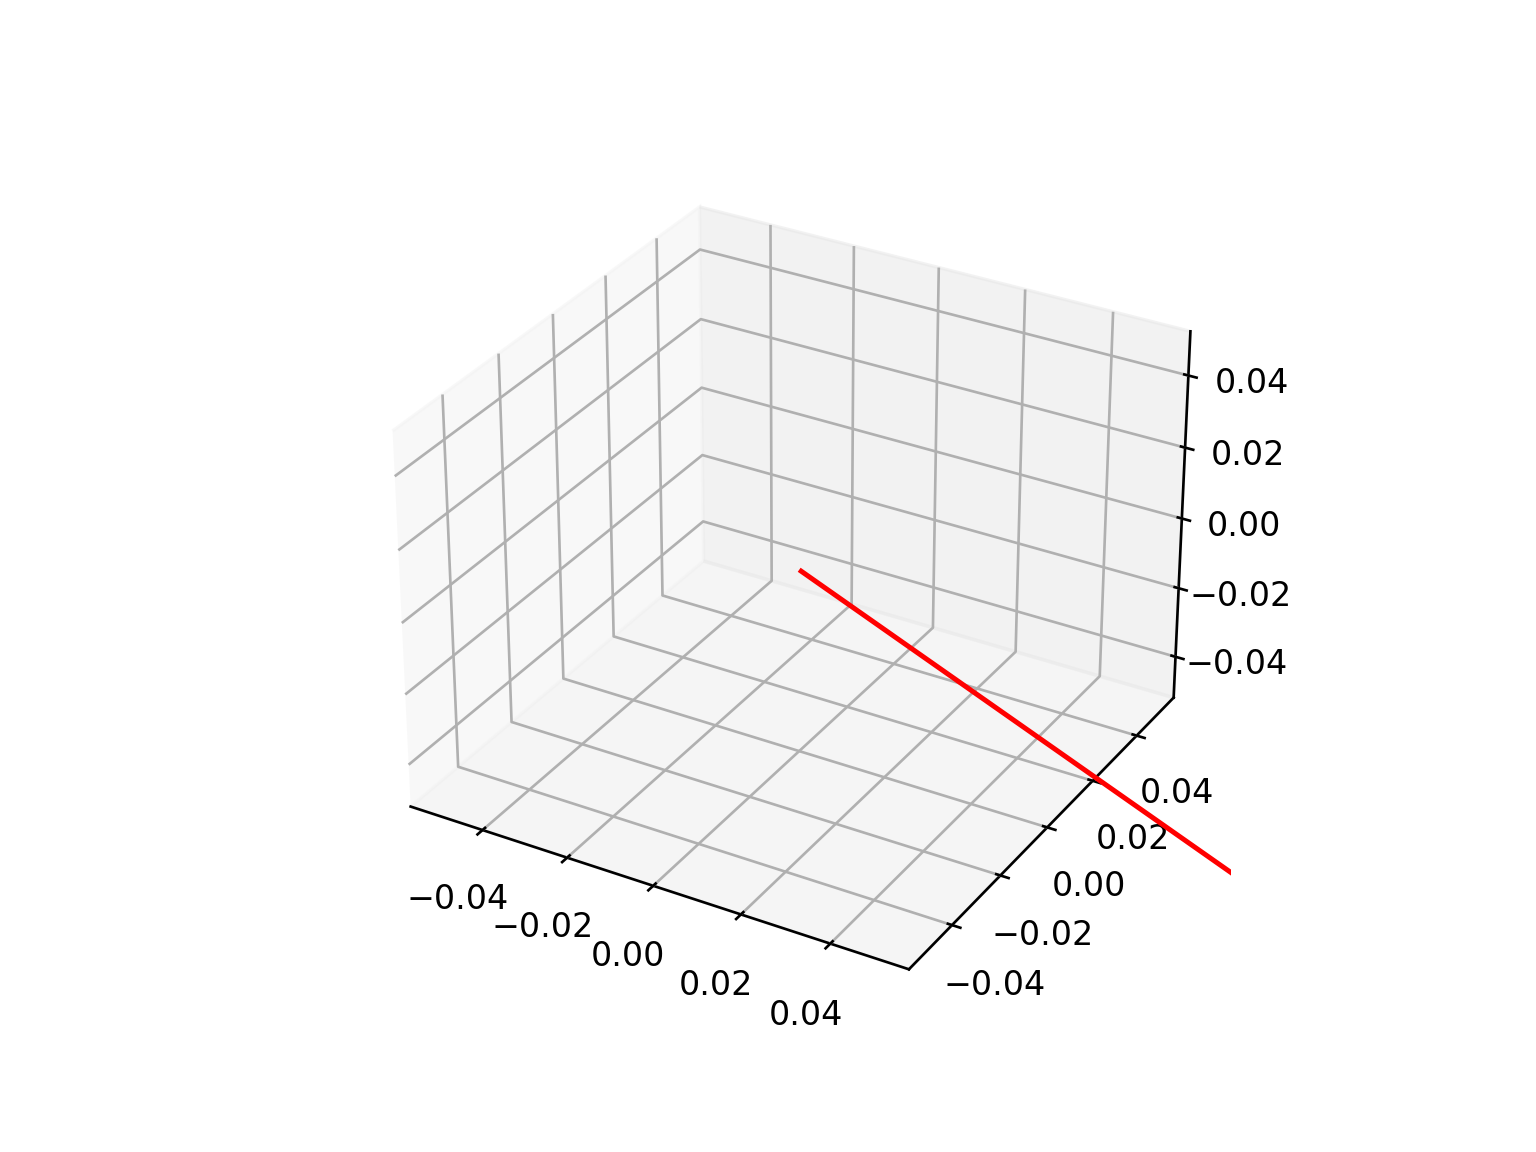

[ 0.5   0.   -0.25]


In [93]:
fig0 = plt.figure(dpi=120)
ax0 = fig0.add_subplot(projection='3d')

Spin_0 = S([1,1j,0]).real
print(Spin_0)
              
ax0.quiver(0,0,0,Spin_0[0],Spin_0[1],Spin_0[2],color="r",label=r"$\vec{S}$")

<IPython.core.display.Javascript object>


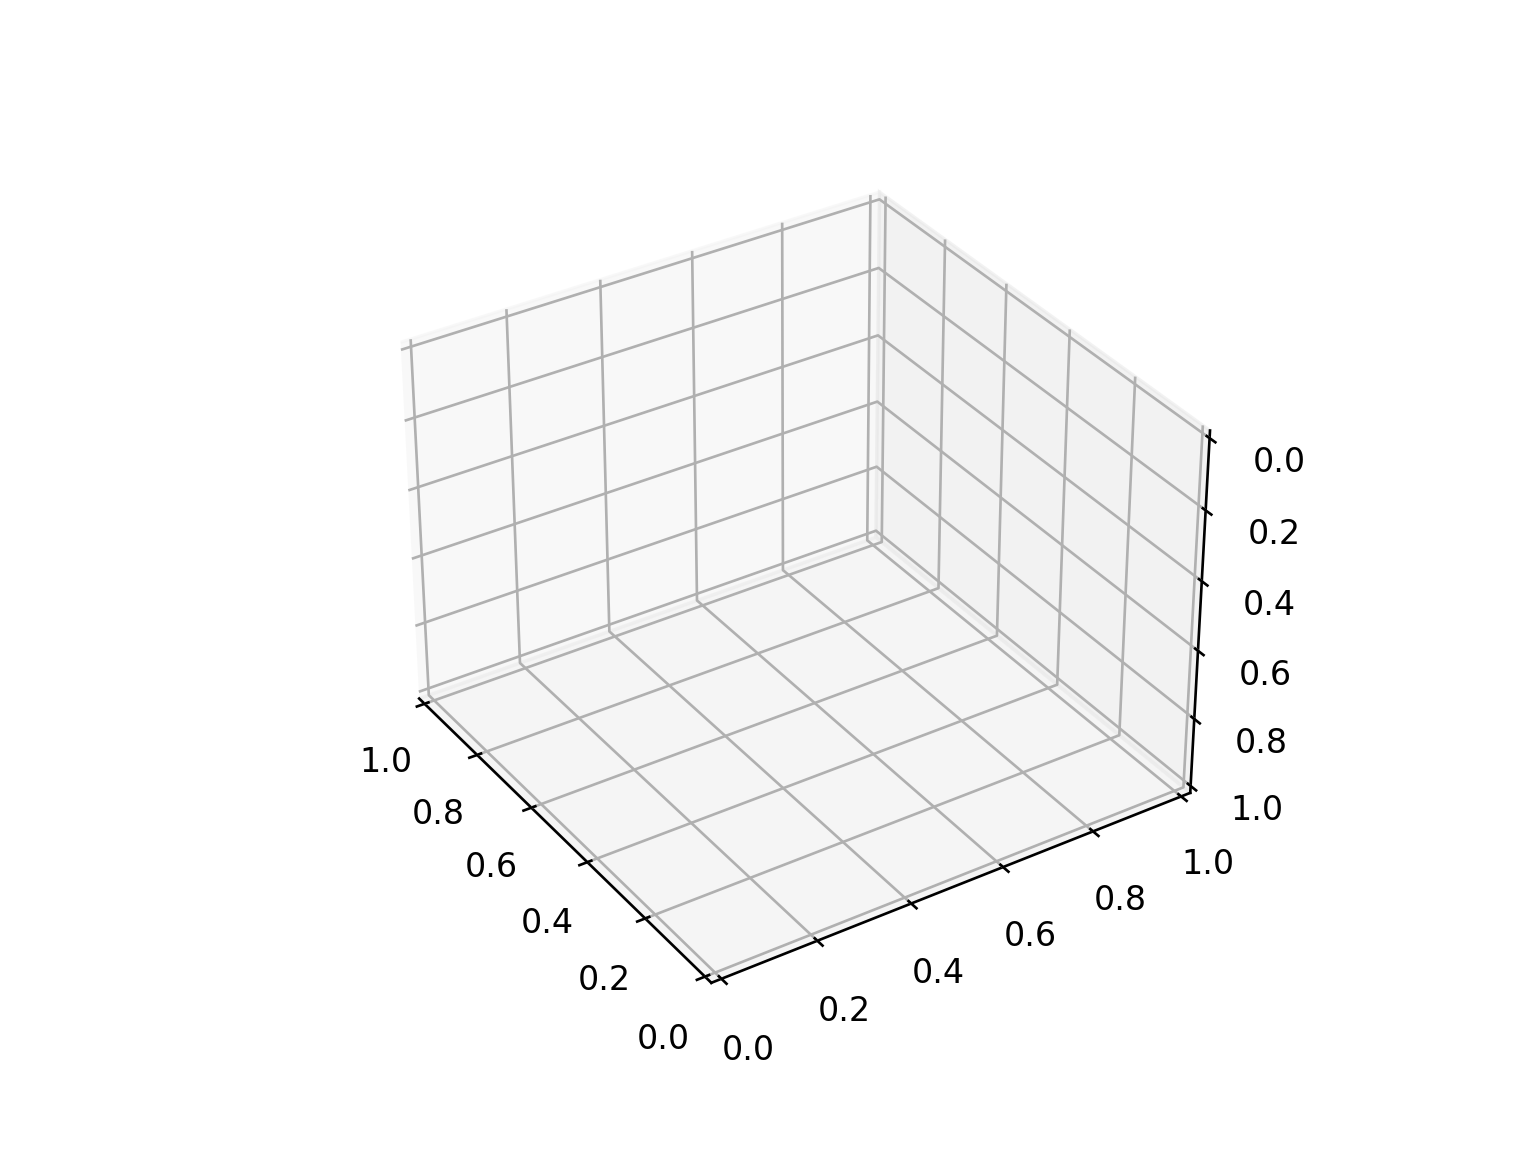

In [62]:
%matplotlib notebook
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
quiver = ax.quiver
ax.grid()

 

# ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph(i):
    i = i
    ax.cla()
    ax.quiver(0,0,0,Spin_S[i,0],Spin_S[i,1],Spin_S[i,2],color="r",label=r"$\vec{S}$")
    ax.quiver(0,0,0,Spin_I[i,0],Spin_I[i,1],Spin_I[i,2],color="g",label=r"$\vec{I}$")
    #ax.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    ax.legend()
    ax.view_init(-147,33)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    ax.grid()
    ax.plot(Spin_S[:i+1,0],Spin_S[:i+1,1],Spin_S[:i+1,2],"r-",alpha=0.3)
    ax.plot(Spin_I[:i+1,0],Spin_I[:i+1,1],Spin_I[:i+1,2],"g-",alpha=0.3)
    #ax.plot(sol.y[3][:i+1],sol.y[4][:i+1],sol.y[5][:i+1],"g-")
    ax.scatter(0,0,0,"kx")
    ax.set_title( r'Quantenmechanisch:   B={}, $\alpha$ = {}  '.format(B,a))
    

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 200, interval=0.2, blit=False)


# Exakte Lösung

# Eigenvektoren:
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$
\begin{align*}
    \ket{1} &= \ket{\uparrow\uparrow} \\
    \ket{2} &= \ket{\downarrow\downarrow} \\
    \ket{3} &= \frac{\epsilon_1 +1}{\sqrt{2}N_1}\ket{\uparrow\downarrow} + \frac{\epsilon_1 -1}{\sqrt{2}N_1}\ket{\downarrow\uparrow}  \\
    \ket{4} &= \frac{\epsilon_2 +1}{\sqrt{2}N_2}\ket{\uparrow\downarrow} + \frac{\epsilon_2- 1}{\sqrt{2}N_1}\ket{\downarrow\uparrow}
\end{align*}
$$


In [3]:
# Parameter

B = 9
g1 = 0.5
g2 = 1/20
a = 20

E_1 = B*(g1+g2) + a/4
E_2 = -B*(g1+g2) + a/4
E_3 = -a/4 + np.sqrt(a**2 + (B*(g1-g2))**2)/2
E_4 = -a/4 - np.sqrt(a**2 + (B*(g1-g2))**2)/2

E = np.array([E_1,E_2,E_2,E_4])

E_13 = E_1-E_3
E_14 = E_1-E_4
E_23 = E_2-E_3
E_24 = E_2-E_4

e1 = (a + np.sqrt( (B*(g1-g2))**2 + a**2  ))/(B*(g1-g2))
e2 = (a - np.sqrt( (B*(g1-g2))**2 + a**2  ))/(B*(g1-g2))
N1 = np.sqrt(e1**2 + 1)
N2 = np.sqrt(e2**2 + 1)


S_x = np.array([[0, 0, 0.5*(e1-1)/(N1*np.sqrt(2)), 0.5*(e2-1)/(N2*np.sqrt(2))],
                [0, 0, 0.5*(e1+1)/(N1*np.sqrt(2)), 0.5*(e2+1)/(N2*np.sqrt(2))],
                [0.5*(e1-1)/(N1*np.sqrt(2)),0.5*(e1+1)/(N1*np.sqrt(2)), 0 , 0],
                [0.5*(e2-1)/(N2*np.sqrt(2)),0.5*(e2+1)/(N2*np.sqrt(2)), 0 , 0]
               ])



S_y = np.array([[0, 0, -0.5j*(e1-1)/(N1*np.sqrt(2)), -0.5j*(e2-1)/(N2*np.sqrt(2))],
                [0, 0, 0.5j*(e1+1)/(N1*np.sqrt(2)), 0.5j*(e2+1)/(N2*np.sqrt(2))],
                [0.5j*(e1-1)/(N1*np.sqrt(2)),-0.5j*(e1+1)/(N1*np.sqrt(2)), 0 , 0],
                [0.5j*(e2-1)/(N2*np.sqrt(2)),-0.5j*(e2+1)/(N2*np.sqrt(2)), 0 , 0]
               ])

S_z = np.array([[0.5, 0, 0, 0],
                [0, -0.5, 0, 0],
                [0, 0, e1/(N1*N1) , (e1+e2)/(N1*N2)],
                [0, 0, (e1+e2)/(N1*N2), e2/(N2*N2)]
               ])

I_x = np.array([[0, 0, 0.5*(e1+1)/(N1*np.sqrt(2)), 0.5*(e2+1)/(N2*np.sqrt(2))],
                [0, 0, 0.5*(e1-1)/(N1*np.sqrt(2)), 0.5*(e2-1)/(N2*np.sqrt(2))],
                [0.5*(e1+1)/(N1*np.sqrt(2)),0.5*(e1-1)/(N1*np.sqrt(2)), 0 , 0],
                [0.5*(e2+1)/(N2*np.sqrt(2)),0.5*(e2-1)/(N2*np.sqrt(2)), 0 , 0]
               ])

I_y = np.array([[0, 0, -0.5j*(e1+1)/(N1*np.sqrt(2)), -0.5j*(e2+1)/(N2*np.sqrt(2))],
                [0, 0, 0.5j*(e1-1)/(N1*np.sqrt(2)), 0.5j*(e2-1)/(N2*np.sqrt(2))],
                [0.5j*(e1+1)/(N1*np.sqrt(2)),-0.5j*(e1-1)/(N1*np.sqrt(2)), 0 , 0],
                [0.5j*(e2+1)/(N2*np.sqrt(2)),-0.5j*(e2-1)/(N2*np.sqrt(2)), 0 , 0]
               ])

I_z = np.array([[0.5, 0, 0, 0],
                [0, -0.5, 0, 0],
                [0, 0, -e1/(N1*N1) , -(e1+e2)/(N1*N2)],
                [0, 0, -(e1+e2)/(N1*N2), -e2/(N2*N2)]
               ])

def c_(Eig, Psi_0):
    c = np.array([np.vdot(Eig[:,i], Psi_0) for i in np.arange(4)])
    return c.T
Eig = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,(e1+1)/(np.sqrt(2)*N1),(e1-1)/(np.sqrt(2)*N1)],
                [0,0,(e2+1)/(np.sqrt(2)*N2),(e1-1)/(np.sqrt(2)*N2)]
               ]).T

Psi_0 = 0.5*np.array([1,1j,1j,1])

C = c_(Eig,Psi_0)

#print(np.vdot(Eig[:,2],Psi_0))

c = np.array([0.5, 0.5j, ((e1+1)*1j + e1-1)/(np.sqrt(8)*N1),((e2+1)*1j + e2-1)/(np.sqrt(8)*N2)])

def Spin(M,T):
    Spin = []
    for t in T:
        if t%50==0:
            print(t)
        Summe = 0
        for i in np.arange(4):
            for j in np.arange(4):
                Summe += np.exp(1j*(E[i]-E[j])*t) * M[i,j] * np.conj(c[i])*c[j]        
        Spin.append(Summe)
    return np.array(Spin)    


t = np.arange(0,80,0.00025)            
Spin_S = np.array([Spin(S_x,t).real, Spin(S_y,t).real, Spin(S_z,t).real ]  ).T 
Spin_I = np.array([Spin(I_x,t).real, Spin(I_y,t).real, Spin(I_z,t).real ]  ).T
#plt.figure()
#plt.plot(t,Spin_)

print("finish")

0.0
50.0
0.0
50.0
0.0
50.0
0.0
50.0
0.0
50.0
0.0
50.0
finish


In [6]:
print(Spin_S)

[[ 0.5    0.     0.   ]
 [ 0.499  0.02   0.002]
 [ 0.497  0.04   0.004]
 ...
 [ 0.449 -0.012  0.04 ]
 [ 0.457  0.004  0.038]
 [ 0.464  0.022  0.036]]


<IPython.core.display.Javascript object>


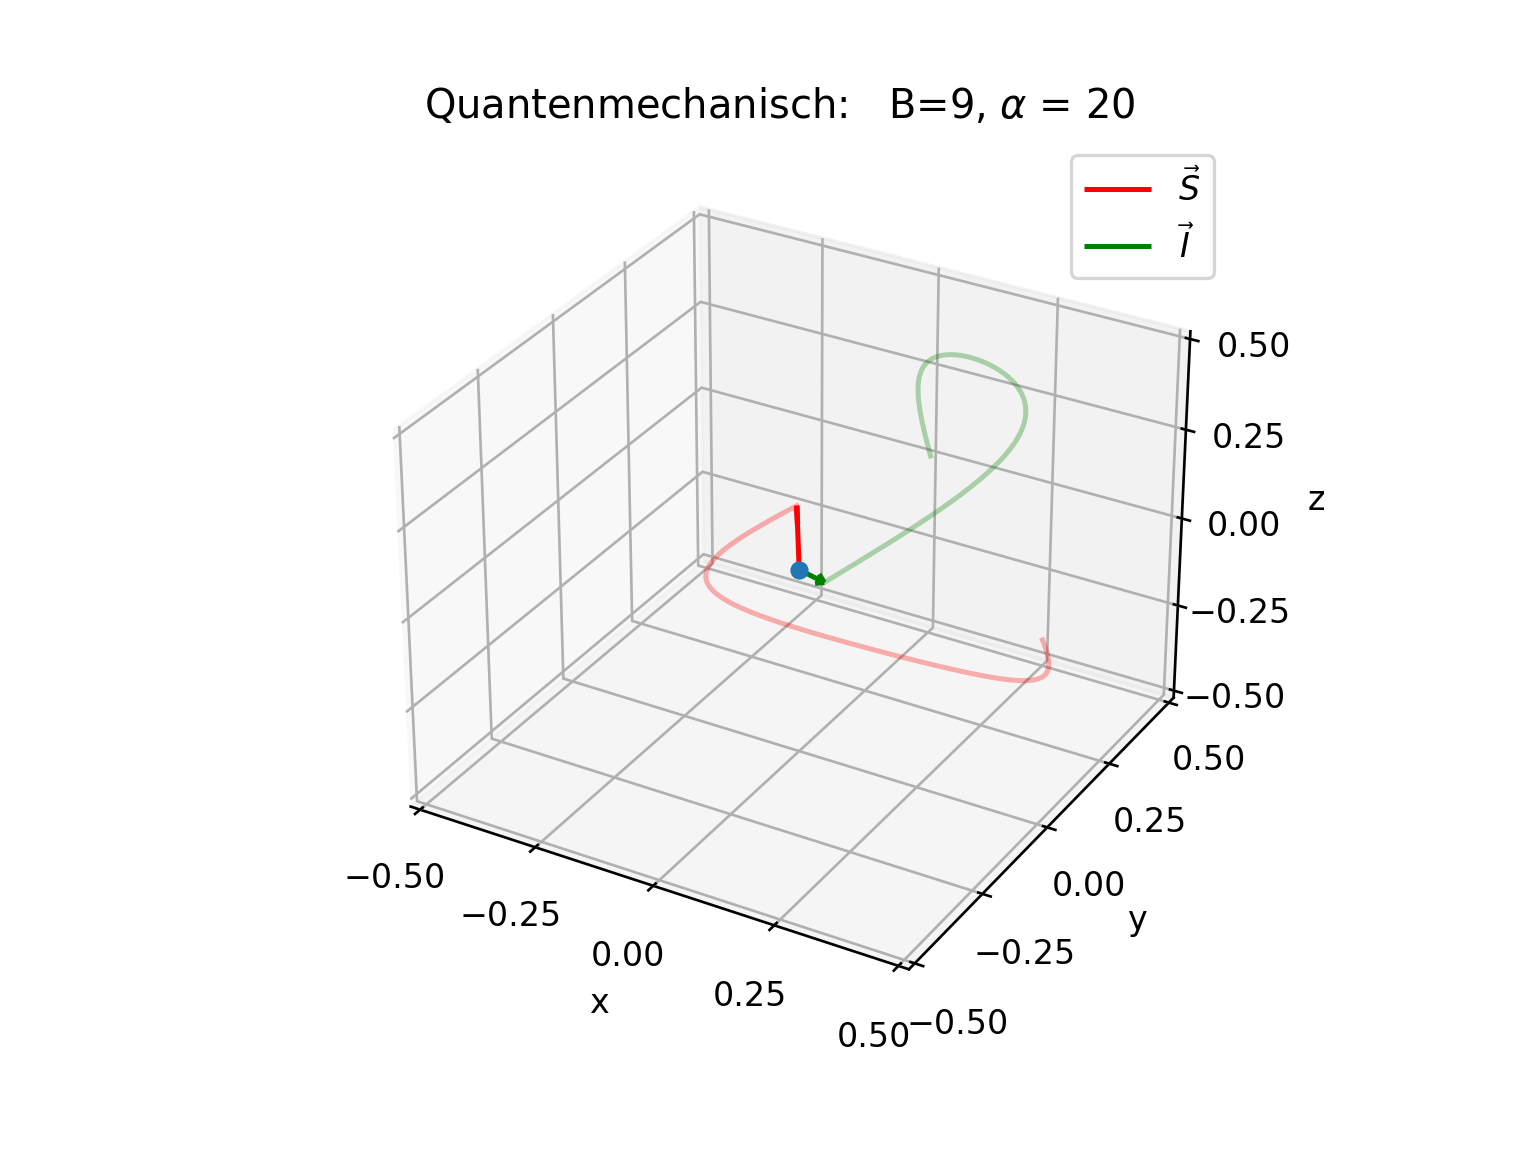

In [7]:
%matplotlib notebook
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
quiver = ax.quiver
ax.grid()



ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph(i):
    i = i*5
    ax.cla()
    ax.quiver(0,0,0,Spin_S[i,0],Spin_S[i,1],Spin_S[i,2],color="r",label=r"$\vec{S}$")
    ax.quiver(0,0,0,Spin_I[i,0],Spin_I[i,1],Spin_I[i,2],color="g",label=r"$\vec{I}$")
    #ax.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    
    ax.legend()
    #ax.view_init(-147-i/30,33+i/25)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    ax.grid()
    ax.plot(Spin_S[:i+1,0],Spin_S[:i+1,1],Spin_S[:i+1,2],"r-",alpha=0.3)
    ax.plot(Spin_I[:i+1,0],Spin_I[:i+1,1],Spin_I[:i+1,2],"g-",alpha=0.3)
    ax.set_title( r'Quantenmechanisch:   B={}, $\alpha$ = {}  '.format(B,a))
    ax.scatter(0,0,0,"kx")
    
    

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 500, interval=0.02, blit=False)


<IPython.core.display.Javascript object>


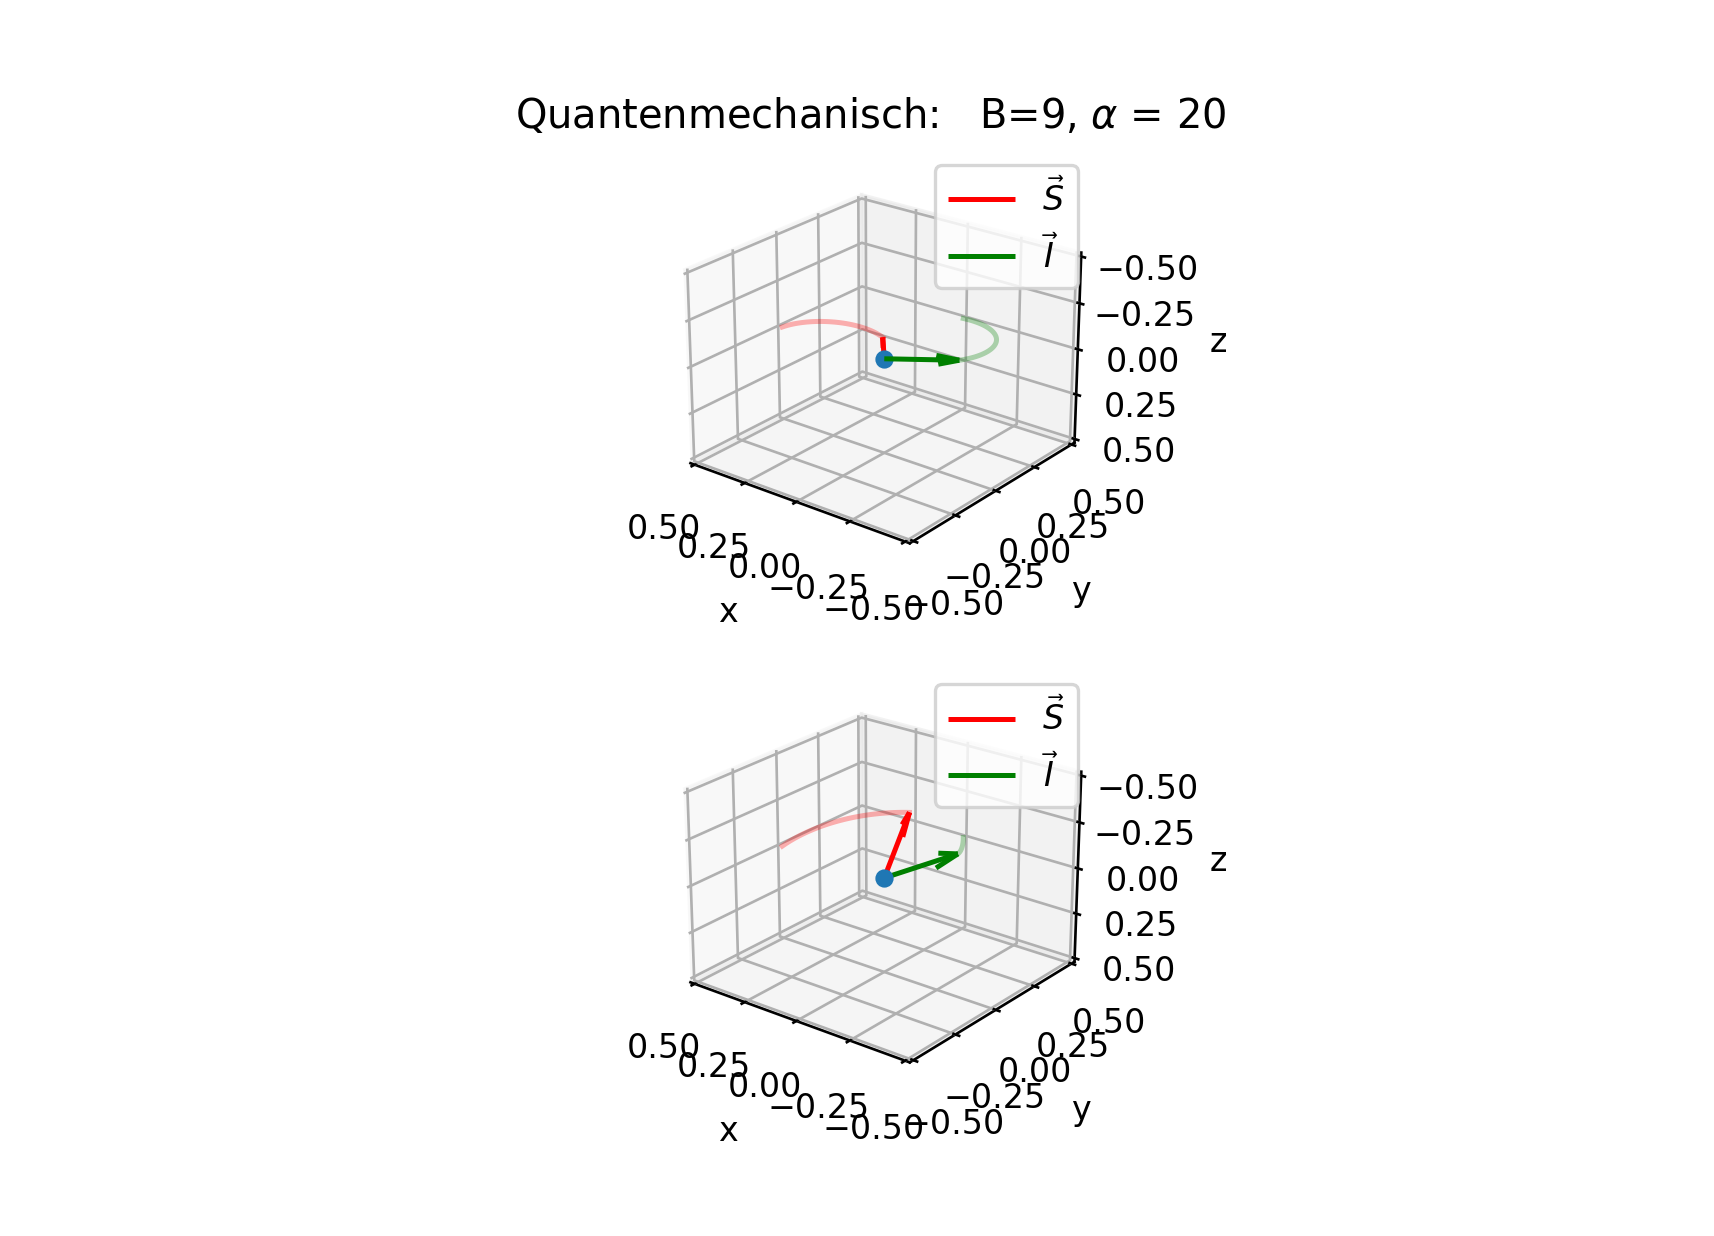

[[ 0.5    0.5    0.5   ...  0.131  0.125  0.12 ]
 [ 0.     0.006  0.011 ...  0.449  0.451  0.453]
 [ 0.    -0.001 -0.002 ... -0.085 -0.084 -0.084]
 [ 0.    -0.    -0.    ...  0.314  0.315  0.315]
 [ 0.5    0.5    0.5   ...  0.423  0.423  0.423]
 [ 0.     0.001  0.002 ...  0.085  0.084  0.084]]


In [22]:
%matplotlib notebook
fig = plt.figure(dpi=120)
ax = fig.add_subplot(211,projection='3d')
ax2 = fig.add_subplot(212,projection='3d')
quiver = ax.quiver
ax.grid()



# ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph(i):
    i = i
    ax.cla()
    ax.quiver(0,0,0,Spin_S[i,0],Spin_S[i,1],Spin_S[i,2],color="r",label=r"$\vec{S}$")
    ax.quiver(0,0,0,Spin_I[i,0],Spin_I[i,1],Spin_I[i,2],color="g",label=r"$\vec{I}$")
    #ax.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    ax.legend()
    ax.view_init(-147-i/10,33+i/5)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    ax.grid()
    ax.plot(Spin_S[:i+1,0],Spin_S[:i+1,1],Spin_S[:i+1,2],"r-",alpha=0.3)
    ax.plot(Spin_I[:i+1,0],Spin_I[:i+1,1],Spin_I[:i+1,2],"g-",alpha=0.3)
    #ax.plot(sol.y[3][:i+1],sol.y[4][:i+1],sol.y[5][:i+1],"g-")
    ax.scatter(0,0,0,"kx")
    ax.set_title( r'Quantenmechanisch:   B={}, $\alpha$ = {}  '.format(B,a))
    

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 200, interval=0.2, blit=False)


def Klassischer_Spin(t,S):
    [S_x, S_y , S_z, I_x, I_y, I_z] = S

    dS_x = a*I_y*S_z - (g1*B + a*I_z)*S_y
    dS_y = (g1*B+a*I_z)*S_x - a*I_x*S_z
    dS_z = a*I_x*S_y - a*I_y*S_x

    dI_x = a*S_y*I_z - (g2*B+a*S_z)*I_y 
    dI_y = (g2*B+a*S_z)*I_x - a*S_x*I_z
    dI_z = a*S_x*I_y - a*S_y*I_x

    return np.array([dS_x, dS_y, dS_z, dI_x, dI_y, dI_z])

# DGL lösen:
Spin_0 = 0.5*np.array([1,0,0,0,1,0])
t = np.arange(0,80,0.00025)
sol = sc.solve_ivp(Klassischer_Spin, y0= Spin_0, t_span = [t[0],t[-1]], t_eval = t, method="RK45" )


#quiver2 = ax2.quiver



#ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph2(i):
    i = i 
    ax2.cla()
    ax2.quiver(0,0,0,sol.y[0][i],sol.y[1][i],sol.y[2][i],color="r",label=r"$\vec{S}$")
    ax2.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    ax2.legend()
    ax2.view_init(-147-i/10,33+i/5)
    ax2.set_xlim([-0.5,0.5])
    ax2.set_ylim([-0.5,0.5])
    ax2.set_zlim([-0.5,0.5])
    ax2.set_xticks(ticks)
    ax2.set_yticks(ticks)
    ax2.set_zticks(ticks)
    
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("z")
    
    ax2.grid()
    ax2.plot(sol.y[0][:i+1],sol.y[1][:i+1],sol.y[2][:i+1],"r-",alpha=0.3)
    ax2.plot(sol.y[3][:i+1],sol.y[4][:i+1],sol.y[5][:i+1],"g-", alpha=0.3)
    ax2.scatter(0,0,0,"kx")
    #ax2.set_title( r'Klassisch:   B={}, $\alpha$ = {} '.format(B,a))
    
print(sol.y)
ani2 = matplotlib.animation.FuncAnimation(fig, update_graph2, 200, interval=0.01, blit=False)

<IPython.core.display.Javascript object>


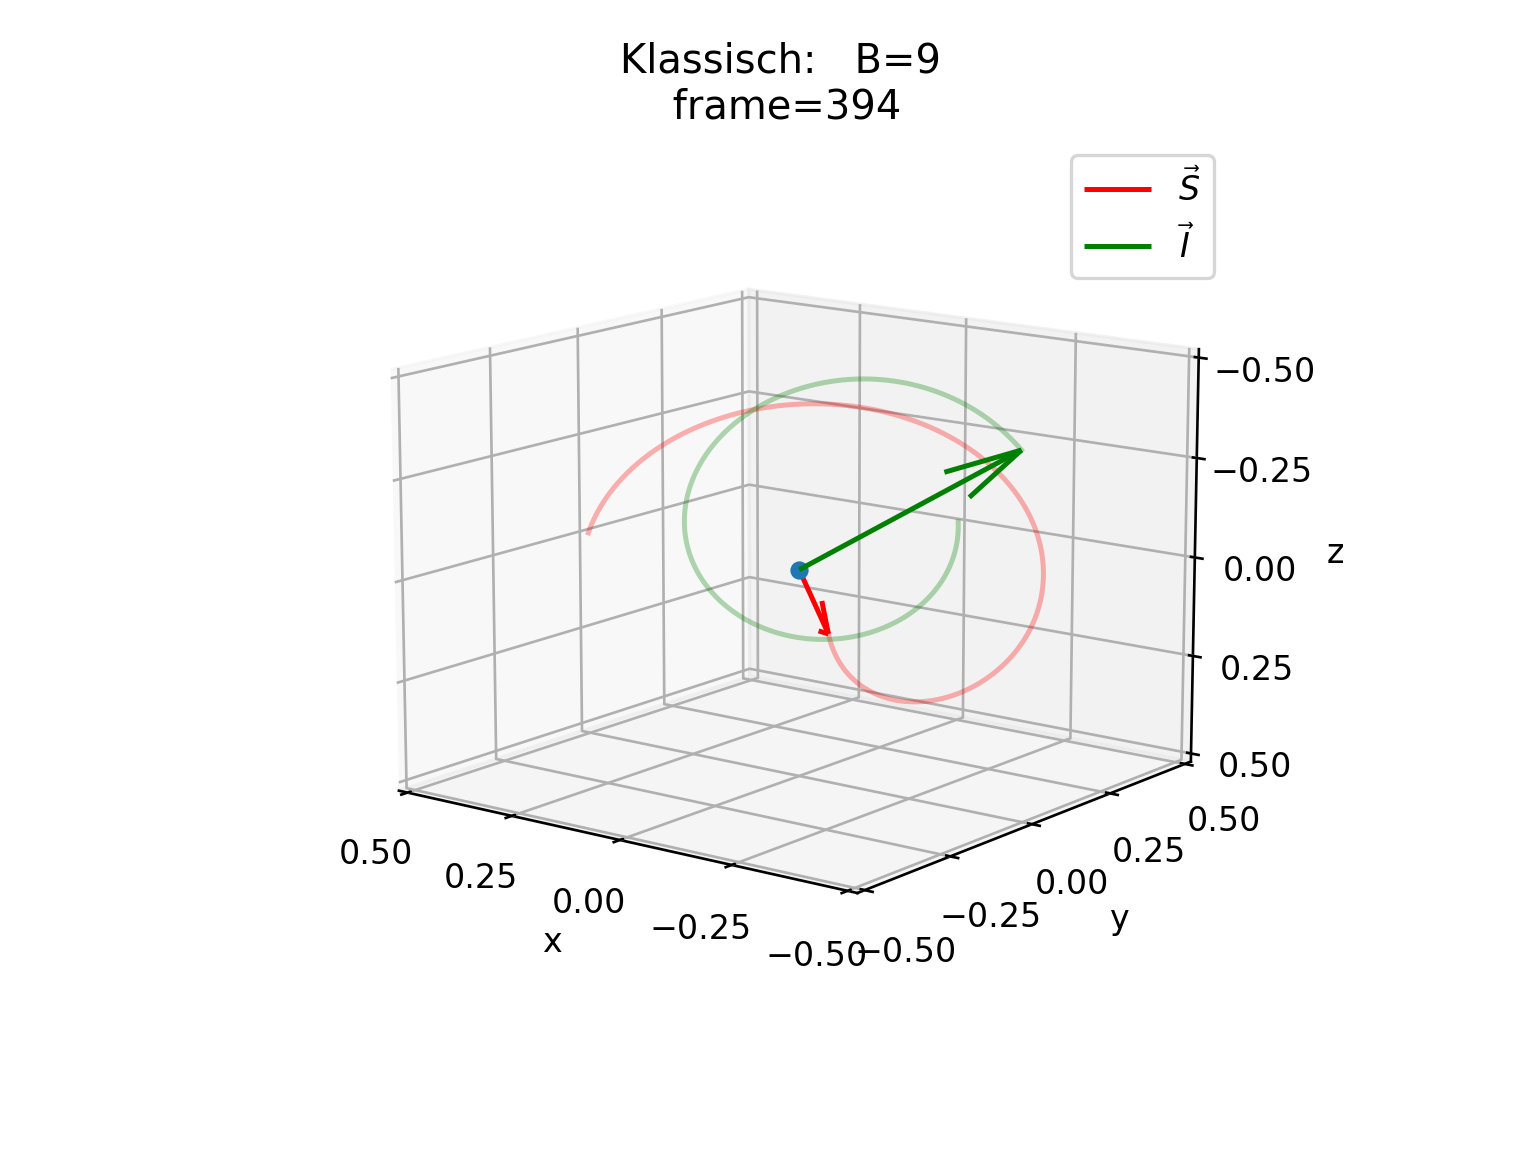

In [4]:
# B = 7
# g1 = 1
# g2 = 1/50
# a = 4


def Klassischer_Spin(t,S):
    [S_x, S_y , S_z, I_x, I_y, I_z] = S

    dS_x = a*I_y*S_z - (g1*B + a*I_z)*S_y
    dS_y = (g1*B+a*I_z)*S_x - a*I_x*S_z
    dS_z = a*I_x*S_y - a*I_y*S_x

    dI_x = a*S_y*I_z - (g2*B+a*S_z)*I_y 
    dI_y = (g2*B+a*S_z)*I_x - a*S_x*I_z
    dI_z = a*S_x*I_y - a*S_y*I_x

    return np.array([dS_x, dS_y, dS_z, dI_x, dI_y, dI_z])

# DGL lösen:
Spin_0 = 0.5*np.array([1,0,0,0,1,0])
t = np.arange(0,200,0.001)
sol = sc.solve_ivp(Klassischer_Spin, y0= Spin_0, t_span = [t[0],t[-1]], t_eval = t, method="RK45" )

# fig, ax = plt.subplots(3,dpi=150)
# ax[1].plot(sol.t,sol.y[0])
# ax[1].plot(sol.t,sol.y[3])
# ax[1].set_title("Sx(t)")
# ax[2].plot(sol.t,sol.y[1])
# ax[2].plot(sol.t,sol.y[4])
# ax[2].set_title("Sy(t)")
# ax[0].plot(sol.t,sol.y[2])
# ax[0].plot(sol.t,sol.y[5])
# ax[0].set_title("Sz(t)")
# # plt.plot(sol.t,sol.y[3])
# # plt.plot(sol.t,sol.y[4])



%matplotlib notebook
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
#graph = ax.plot(sol.y[0][0],sol.y[1][0],sol.y[2][0])
#quiver = ax.quiver



ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph(i):
    i = i*2 
    ax.cla()
    ax.quiver(0,0,0,sol.y[0][i],sol.y[1][i],sol.y[2][i],color="r",label=r"$\vec{S}$")
    ax.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    ax.legend()
    ax.view_init(-147-i/20,33+i/20)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    ax.grid()
    ax.plot(sol.y[0][:i+1],sol.y[1][:i+1],sol.y[2][:i+1],"r-",alpha=0.3)
    ax.plot(sol.y[3][:i+1],sol.y[4][:i+1],sol.y[5][:i+1],"g-", alpha=0.3)
    ax.scatter(0,0,0,"kx")
    ax.set_title( 'Klassisch:   B={} \n frame={} '.format(B,i))
    

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 250, 
                               interval=0.01, blit=False)



<IPython.core.display.Javascript object>


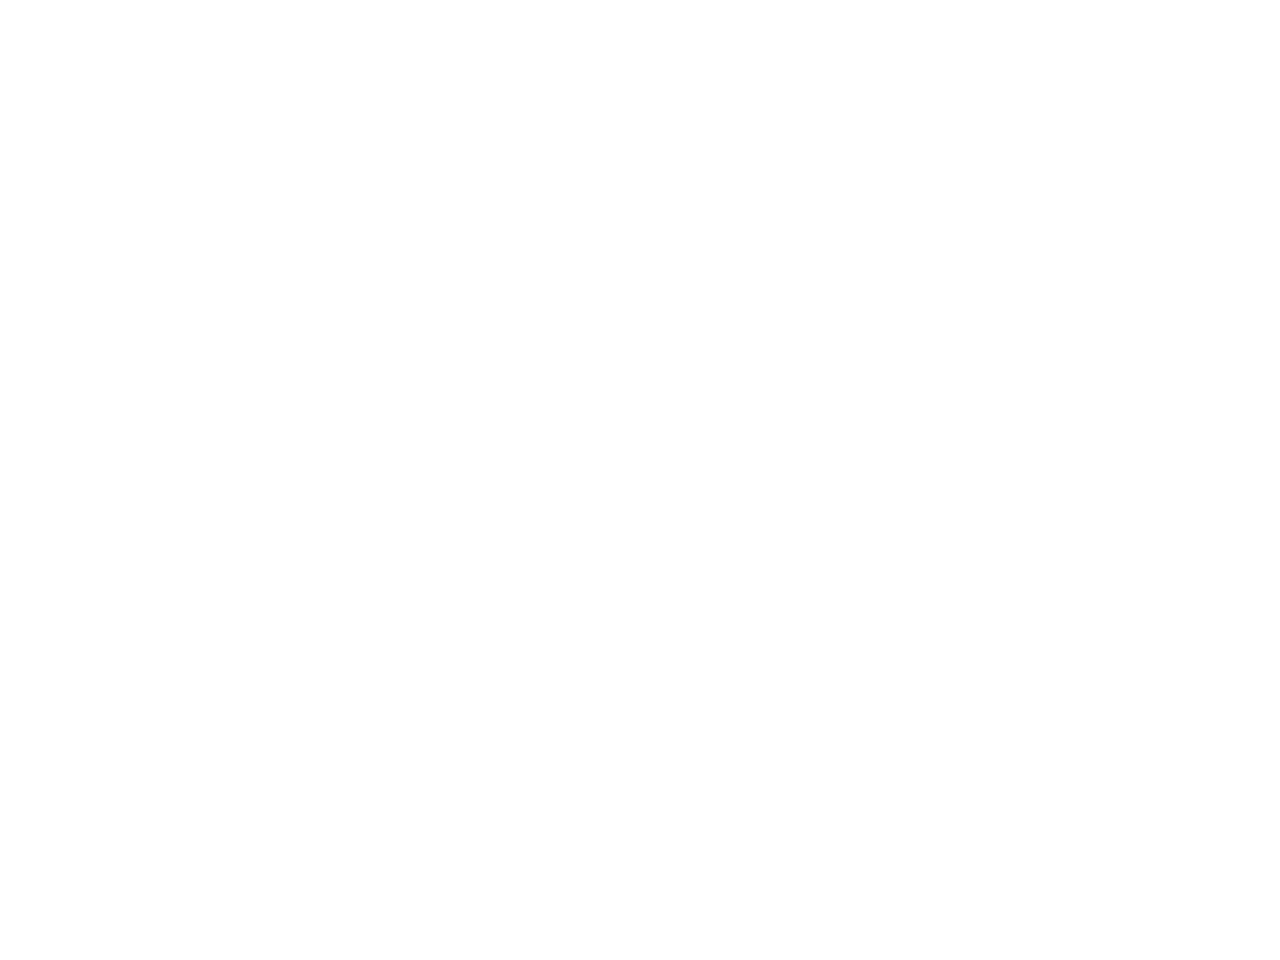

()


In [394]:
class Spin_3D:
    def __init__(self,S,I,Parameter,name):
        self.name = name
        self.B = Parameter[0]
        self.g1 = Parameter[1]
        self.g2 = Parameter[2]
        self.a = Parameter[3]
        self.fig = plt.figure()
        self.S = S
        self.I = I
        
        self.ax = fig.add_subplot(projection="3d")
        print(np.shape(S[1,3]))
        self.ani = matplotlib.animation.FuncAnimation(self.fig, self.update_graph, 200, interval=0.01, blit=False)
        
        
    def update_graph(self,i):
        i = i 
        #print("ja")
        #self.ax.cla()
        ax.quiver(0,0,0,self.S[0,i],self.S[1,i],self.S[2,i],color="r",label=r"$\vec{S}$")
        ax.quiver(0,0,0,self.I[0,i],self.I[1,i],self.I[2,i],color="g",label=r"$\vec{I}$")
        ax.legend()
        ax.view_init(-147-i/20,33+i/20)
        ax.set_xlim([-0.5,0.5])
        ax.set_ylim([-0.5,0.5])
        ax.set_zlim([-0.5,0.5])
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_zticks(ticks)
    
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
    
        ax.grid()
        ax.plot(self.S[0,:i+1],self.S[1,:i+1],self.S[2,:i+1],"r-",alpha=0.3)
        ax.plot(self.I[0,:i+1],self.I[1,:i+1],self.I[2,:i+1],"g-",alpha=0.3)
        ax.scatter(0,0,0,"kx")
        #ax.set_title( self.name,r': B={},  $\alpha$={} '.format(self.B,self.a))
        
Klasse = Spin_3D(sol.y[:3],sol.y[3:],[B,g1,g2,a],"Klas")